In [1]:
import pandas
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer

In [2]:
dataset = pandas.read_csv('dataset.csv')

In [3]:
dataset

,Year,Yield
0,1987,2361
1,1988,2192
2,1989,2568
3,1990,2589
4,1991,2537
5,1992,3241
6,1993,2945
7,1994,3060
8,1995,3050
9,1996,3393


In [4]:
#splitting the table
x=dataset.iloc[:,0:1].values
y=dataset.iloc[:,1].values
y = y.reshape(-1,1)

In [5]:
#splitting the data from training and testing data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42, shuffle = False)
print(x_train, x_test, y_train, y_test)

[[1987]
 [1988]
 [1989]
 [1990]
 [1991]
 [1992]
 [1993]
 [1994]
 [1995]
 [1996]
 [1997]
 [1998]
 [1999]
 [2000]
 [2001]
 [2002]
 [2003]
 [2004]
 [2005]
 [2006]
 [2007]
 [2008]
 [2009]
 [2010]
 [2011]] [[2012]
 [2013]
 [2014]
 [2015]
 [2016]
 [2017]
 [2018]
 [2019]
 [2020]
 [2021]
 [2022]] [[2361]
 [2192]
 [2568]
 [2589]
 [2537]
 [3241]
 [2945]
 [3060]
 [3050]
 [3393]
 [3761]
 [2853]
 [3844]
 [3739]
 [4155]
 [4067]
 [4104]
 [4299]
 [4361]
 [4305]
 [4425]
 [4246]
 [3793]
 [4213]
 [3861]] [[4456]
 [4338]
 [4682]
 [4251]
 [4223]
 [4286]
 [4344]
 [4287]
 [4188]
 [4331]
 [4283]]


In [6]:
from sklearn.preprocessing import StandardScaler
st_x_train=StandardScaler().fit(x_train)
st_y_train=StandardScaler().fit(y_train)
st_x_test=StandardScaler()
st_y_test=StandardScaler()
x_train_t=st_x_train.transform(x_train)
y_train_t=st_y_train.transform(y_train)
y_test_t=st_y_train.transform(y_test)
x_test_t=st_x_train.transform(x_test)
print(x_test_t)
print(x_train_t)

[[1.80277564]
 [1.94145069]
 [2.08012574]
 [2.21880078]
 [2.35747583]
 [2.49615088]
 [2.63482593]
 [2.77350098]
 [2.91217603]
 [3.05085108]
 [3.18952613]]
[[-1.66410059]
 [-1.52542554]
 [-1.38675049]
 [-1.24807544]
 [-1.10940039]
 [-0.97072534]
 [-0.83205029]
 [-0.69337525]
 [-0.5547002 ]
 [-0.41602515]
 [-0.2773501 ]
 [-0.13867505]
 [ 0.        ]
 [ 0.13867505]
 [ 0.2773501 ]
 [ 0.41602515]
 [ 0.5547002 ]
 [ 0.69337525]
 [ 0.83205029]
 [ 0.97072534]
 [ 1.10940039]
 [ 1.24807544]
 [ 1.38675049]
 [ 1.52542554]
 [ 1.66410059]]


In [14]:
#for training data and Finding parameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.003, 0.001, 0.01, 1, 10, 100], 'kernel' :['poly'], 'degree':[1,2], 'gamma':[0.0001,0.001,0.01,0.1,1,10,100], 'epsilon':[0, 0.1, 1]}
grid = GridSearchCV(SVR(),param_grid, cv = 10)
grid.fit(x_train_t, y_train_t.ravel())

GridSearchCV(cv=10, estimator=SVR(),
             param_grid={'C': [0.003, 0.001, 0.01, 1, 10, 100],
                         'degree': [1, 2], 'epsilon': [0, 0.1, 1],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'kernel': ['linear']})

In [15]:
print(grid.best_params_)
print(grid.score(x_test_t, y_test_t))

{'C': 10, 'degree': 1, 'epsilon': 0, 'gamma': 0.0001, 'kernel': 'linear'}
-84.41041781173371


In [17]:
Yield_svr = SVR(kernel = 'poly', C = 10, degree = 1, gamma = 0.1, epsilon = 0.1)
Yield_svr.fit(x_test_t, y_test_t.ravel())
Yieldlin = SVR(kernel = 'linear', C = 10, degree = 1, epsilon = 0.1)
Yieldlin.fit(x_test_t, y_test_t.ravel())
Yieldrbf = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon = 0.1)
Yieldrbf.fit(x_test_t, y_test_t.ravel())

SVR(C=100, gamma=0.1)

In [18]:
y_pred = Yield_svr.predict(x_test_t)
y_pred2 = Yieldlin.predict(x_test_t)
y_pred3 = Yieldrbf.predict(x_test_t)

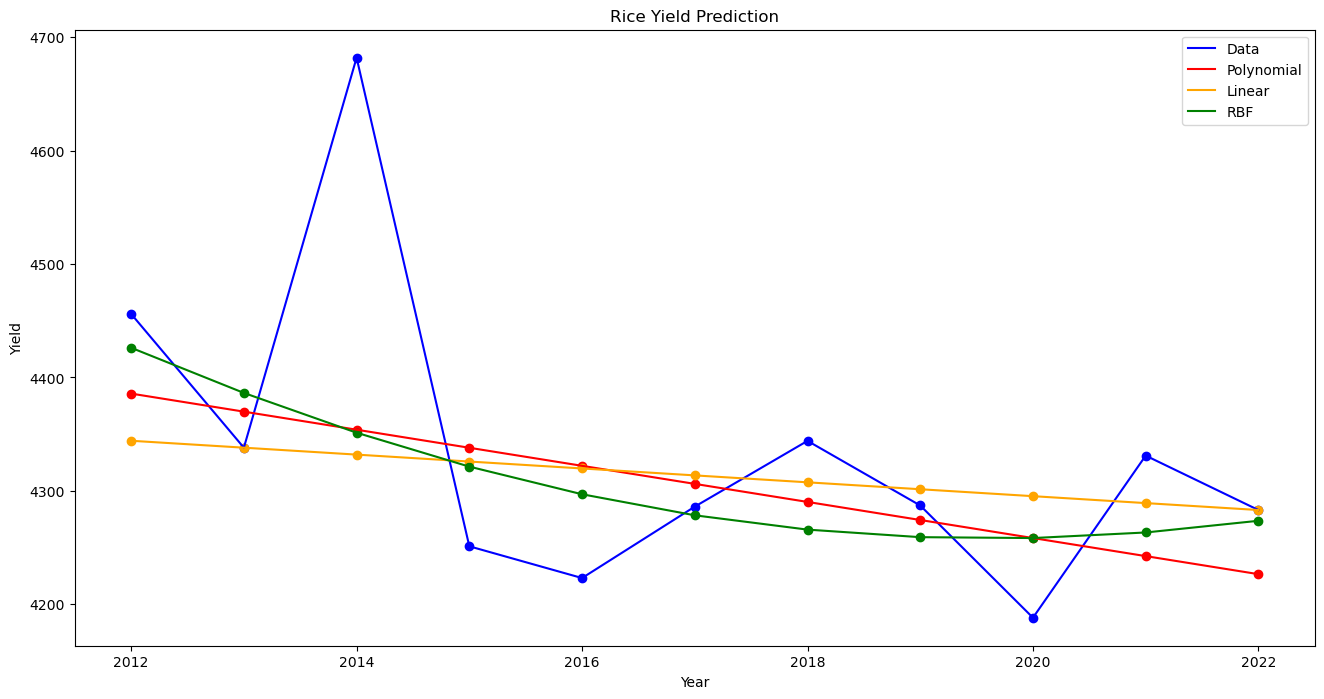

In [19]:
plt.figure(figsize=(16,8))
plt.scatter(st_x_train.inverse_transform(x_test_t), st_y_train.inverse_transform(y_test_t), color = 'blue')
plt.scatter(st_x_train.inverse_transform(x_test_t), st_y_train.inverse_transform(y_pred.reshape(-1,1)), color = 'red')
plt.plot(st_x_train.inverse_transform(x_test_t), st_y_train.inverse_transform(y_test_t), color = 'blue', label = 'Data')
plt.plot(st_x_train.inverse_transform(x_test_t), st_y_train.inverse_transform(y_pred.reshape(-1,1)), color = 'red', label = 'Polynomial')
plt.scatter(st_x_train.inverse_transform(x_test_t), st_y_train.inverse_transform(y_pred2.reshape(-1,1)), color = 'orange')
plt.plot(st_x_train.inverse_transform(x_test_t), st_y_train.inverse_transform(y_pred2.reshape(-1,1)), color = 'orange', label = 'Linear')
plt.scatter(st_x_train.inverse_transform(x_test_t), st_y_train.inverse_transform(y_pred3.reshape(-1,1)), color = 'green')
plt.plot(st_x_train.inverse_transform(x_test_t), st_y_train.inverse_transform(y_pred3.reshape(-1,1)), color = 'green', label = 'RBF')
plt.title('Rice Yield Prediction')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.show()


In [24]:
#testing set only
st_x_train.transform(np.array(2023).reshape(-1,1))

array([[3.32820118]])

In [25]:
# For kernel, refer to ln[9]
st_y_train.inverse_transform(Yieldlin.predict([[3.32820118]]).reshape(-1,1))

array([[4276.89633603]])

In [22]:
pol = st_y_train.inverse_transform(y_pred.reshape(-1,1))
lin = st_y_train.inverse_transform(y_pred2.reshape(-1,1))
rbf = st_y_train.inverse_transform(y_pred3.reshape(-1,1))
print('The RBF prediction is:')
print(rbf)
print('The Linear prediction is:')
print(lin)
print('The Polynomial prediction is:')
print(pol)
print(y_test)

The RBF prediction is:
[[4426.14231112]
 [4386.30551211]
 [4351.1994622 ]
 [4321.2832626 ]
 [4296.91580257]
 [4278.34857299]
 [4265.72138544]
 [4259.06109762]
 [4258.28334191]
 [4263.19715148]
 [4273.51228119]]
The Linear prediction is:
[[4344.11035292]
 [4337.99998776]
 [4331.88962259]
 [4325.77925743]
 [4319.66889227]
 [4313.55852711]
 [4307.44816195]
 [4301.33779679]
 [4295.22743163]
 [4289.11706647]
 [4283.00670131]]
The Polynomial prediction is:
[[4385.71439786]
 [4369.78585444]
 [4353.85731102]
 [4337.9287676 ]
 [4322.00022418]
 [4306.07168076]
 [4290.14313735]
 [4274.21459393]
 [4258.28605051]
 [4242.35750709]
 [4226.42896367]]
[[4456]
 [4338]
 [4682]
 [4251]
 [4223]
 [4286]
 [4344]
 [4287]
 [4188]
 [4331]
 [4283]]


In [26]:
import numpy as np
print('The RMSE in RBF kernel in testing data is: %.2f'% np.sqrt(mean_squared_error(y_test, rbf)))

The RMSE in RBF kernel in testing data is: 112.67


In [27]:
print('The RMSE in linear kernel in testing data is: %.2f'% np.sqrt(mean_squared_error(y_test, lin)))

The RMSE in linear kernel in testing data is: 122.69


In [28]:
print('The RMSE in polynomial kernel in testing data is: %.2f'% np.sqrt(mean_squared_error(y_test, pol)))

The RMSE in polynomial kernel in testing data is: 116.95


In [29]:
print('The MAE in linear kernel in testing data is: %.2f'% mean_absolute_error(y_test, lin))

The MAE in linear kernel in testing data is: 78.27


In [30]:
print('The MAE in polynomial kernel in testing data is: %.2f'% mean_absolute_error(y_test, pol))

The MAE in polynomial kernel in testing data is: 83.49


In [31]:
print('The MAE in RBF kernel in testing data is: %.2f'% mean_absolute_error(y_test, rbf))

The MAE in RBF kernel in testing data is: 74.06


In [47]:
Yield_svr1 = SVR(kernel = 'poly', C = 10, degree = 1, gamma = 0.1, epsilon = 0.1)
Yield_svr1.fit(x_train_t, y_train_t.ravel())
Yieldlin1 = SVR(kernel = 'linear', C = 10, degree = 1, epsilon = 0.1)
Yieldlin1.fit(x_train_t, y_train_t.ravel())
Yieldrbf1 = SVR(kernel = 'rbf', C = 100, gamma = 0.1, epsilon = 0.1)
Yieldrbf1.fit(x_train_t, y_train_t.ravel())

SVR(C=100, gamma=0.1)

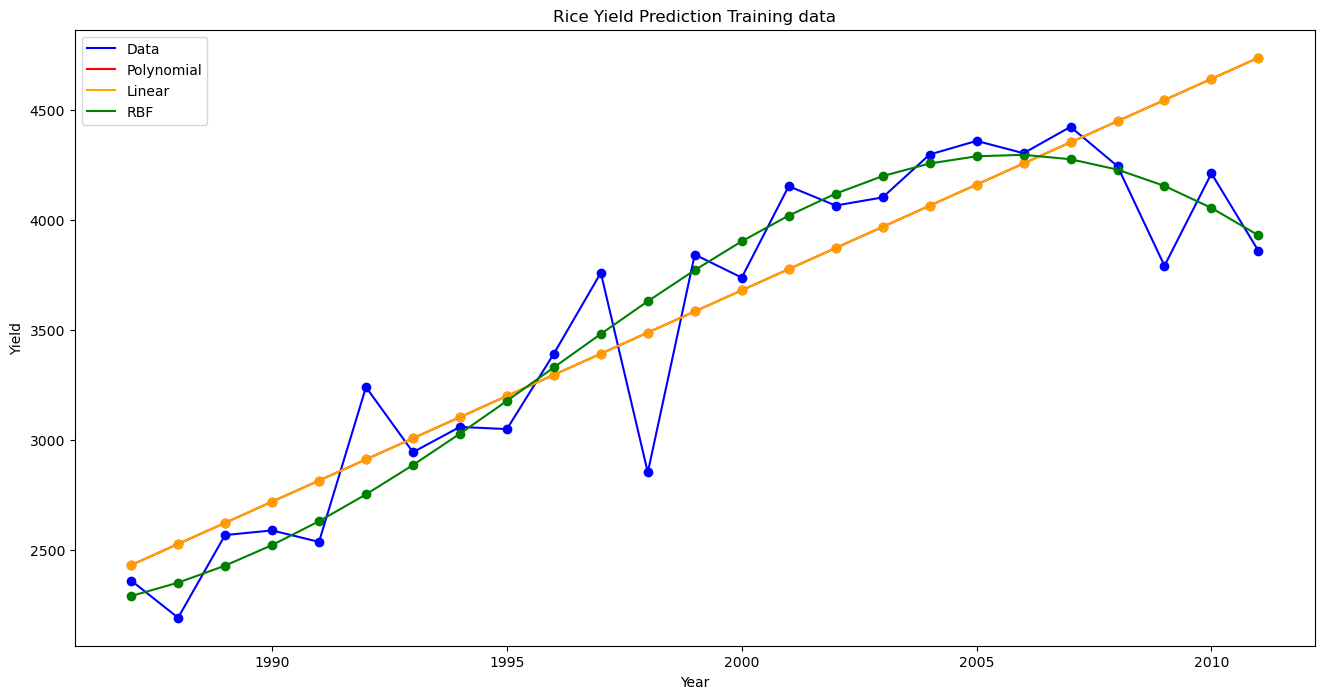

In [50]:
plt.figure(figsize=(16,8))
plt.scatter(st_x_train.inverse_transform(x_train_t), st_y_train.inverse_transform(y_train_t), color = 'blue')
plt.scatter(st_x_train.inverse_transform(x_train_t), st_y_train.inverse_transform(ytrain_pred.reshape(-1,1)), color = 'red')
plt.plot(st_x_train.inverse_transform(x_train_t), st_y_train.inverse_transform(y_train_t), color = 'blue', label = 'Data')
plt.plot(st_x_train.inverse_transform(x_train_t), st_y_train.inverse_transform(ytrain_pred.reshape(-1,1)), color = 'red', label = 'Polynomial')
plt.scatter(st_x_train.inverse_transform(x_train_t), st_y_train.inverse_transform(ytrain_pred2.reshape(-1,1)), color = 'orange')
plt.plot(st_x_train.inverse_transform(x_train_t), st_y_train.inverse_transform(ytrain_pred2.reshape(-1,1)), color = 'orange', label = 'Linear')
plt.scatter(st_x_train.inverse_transform(x_train_t), st_y_train.inverse_transform(ytrain_pred3.reshape(-1,1)), color = 'green')
plt.plot(st_x_train.inverse_transform(x_train_t), st_y_train.inverse_transform(ytrain_pred3.reshape(-1,1)), color = 'green', label = 'RBF')
plt.title('Rice Yield Prediction Training data')
plt.xlabel('Year')
plt.ylabel('Yield')
plt.legend()
plt.show()

In [48]:
ytrain_pred = Yield_svr1.predict(x_train_t)
ytrain_pred2 = Yieldlin1.predict(x_train_t)
ytrain_pred3 = Yieldrbf1.predict(x_train_t)

In [49]:
pol1 = st_y_train.inverse_transform(ytrain_pred.reshape(-1,1))
lin1 = st_y_train.inverse_transform(ytrain_pred2.reshape(-1,1))
rbf1 = st_y_train.inverse_transform(ytrain_pred3.reshape(-1,1))

In [51]:
print('The RMSE in RBF kernel in training data is: %.2f'% np.sqrt(mean_squared_error(y_train, rbf1)))

The RMSE in RBF kernel in training data is: 224.69


In [52]:
print('The RMSE in linear kernel in training data is: %.2f'% np.sqrt(mean_squared_error(y_train, lin1)))

The RMSE in linear kernel in training data is: 336.90


In [53]:
print('The RMSE in polynomial kernel in training data is: %.2f'% np.sqrt(mean_squared_error(y_train, pol1)))

The RMSE in polynomial kernel in training data is: 336.90


In [54]:
print('The MAE in RBF kernel in training data is: %.2f'% mean_absolute_error(y_train, rbf1))

The MAE in RBF kernel in training data is: 149.86


In [55]:
print('The MAE in linear kernel in training data is: %.2f'% mean_absolute_error(y_train, lin1))

The MAE in linear kernel in training data is: 255.80


In [56]:
print('The MAE in polynomial kernel in training data is: %.2f'% mean_absolute_error(y_train, lin1))

The MAE in polynomial kernel in training data is: 255.80
